**ADS**

Shape: (150, 5)

First 5 rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species    

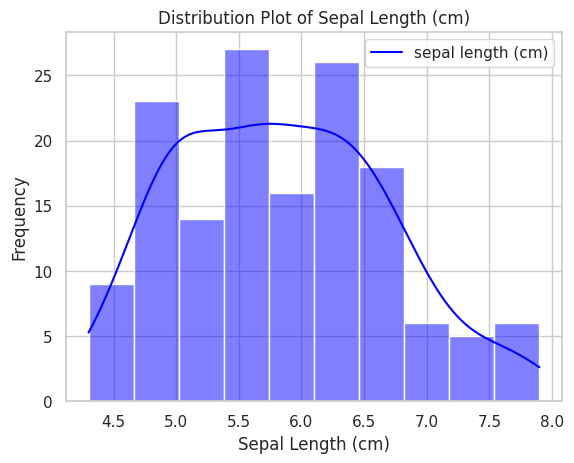

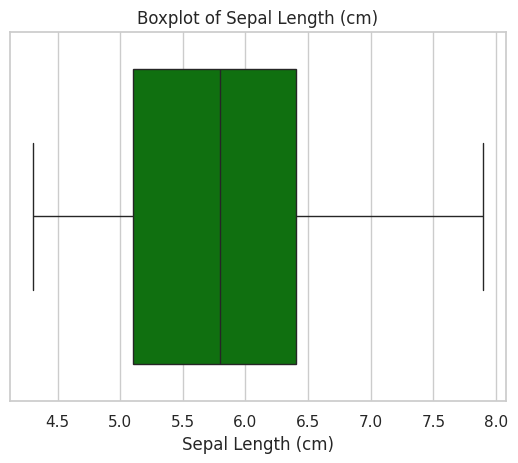


Min: 4.3
Max: 7.9
Range: 3.6000000000000005
Variance: 0.6856935123042505
Standard Deviation: 0.8280661279778629
Q1: 5.1
Q2 (Median): 5.8
Q3: 6.4
IQR: 1.3000000000000007
Skewness: 0.3149109566369728
Kurtosis: -0.5520640413156395


In [ ]:
#1 explore descriptive statistic

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
iris_df = pd.DataFrame(data.data, columns=data.feature_names)

# Replace numerical target with species names
iris_df['species'] = pd.Categorical.from_codes(data.target, data.target_names)

# Print basic information
print("Shape:", iris_df.shape)
print("\nFirst 5 rows:\n", iris_df.head())
print("\nInfo:")
print(iris_df.info())
print("\nMissing values:\n", iris_df.isnull().sum())
print("\nDescription:\n", iris_df.describe())

# Calculate mean, median, and mode for sepal length
mean = iris_df['sepal length (cm)'].mean()
print("\nMean:", mean)
median = iris_df['sepal length (cm)'].median()
print("Median:", median)
mode = iris_df['sepal length (cm)'].mode()
print("Mode:", mode.values)

# Distribution plot
sns.histplot(iris_df['sepal length (cm)'], bins=10, kde=True, color='blue')
plt.title("Distribution Plot of Sepal Length (cm)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.legend(labels=['sepal length (cm)'])
plt.show()

# Boxplot
sns.boxplot(x=iris_df['sepal length (cm)'], color='green')
plt.title("Boxplot of Sepal Length (cm)")
plt.xlabel("Sepal Length (cm)")
plt.show()

# Calculate other statistics
min_val = iris_df['sepal length (cm)'].min()
max_val = iris_df['sepal length (cm)'].max()
range_val = max_val - min_val
variance = iris_df['sepal length (cm)'].var()
std_dev = iris_df['sepal length (cm)'].std()

print("\nMin:", min_val)
print("Max:", max_val)
print("Range:", range_val)
print("Variance:", variance)
print("Standard Deviation:", std_dev)

# Interquartile Range (IQR)
Q1 = iris_df['sepal length (cm)'].quantile(0.25)
Q2 = iris_df['sepal length (cm)'].quantile(0.5)
Q3 = iris_df['sepal length (cm)'].quantile(0.75)
IQR = Q3 - Q1

print("Q1:", Q1)
print("Q2 (Median):", Q2)
print("Q3:", Q3)
print("IQR:", IQR)

# Skewness and Kurtosis
print("Skewness:", iris_df['sepal length (cm)'].skew())
print("Kurtosis:", iris_df['sepal length (cm)'].kurt())


Cleaned DataFrame:
   id  age sex  height_cm  weight_kg   bmi  hours_sleep  \
0   1   25   M        175         70  22.9            7   
1   2   30   F        160         55  21.5            8   
2   3   22   M        180         75  23.1            6   
3   4   35   F        158         50  20.0            7   
4   5   28   M        170         68  23.5            5   

   exercise_hours_weekly  income_usd         city  
0                    3.0       45000     New York  
1                    3.0       45000  Los Angeles  
2                    4.0       52000      Chicago  
3                    2.0       52000      Houston  
4                    3.0       49000      Phoenix  


<ipython-input-5-b0e5319a8c7c>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income_usd'].replace({-45000: 45000, -52000: 52000, -49000: 49000}, inplace=True)
<ipython-input-5-b0e5319a8c7c>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

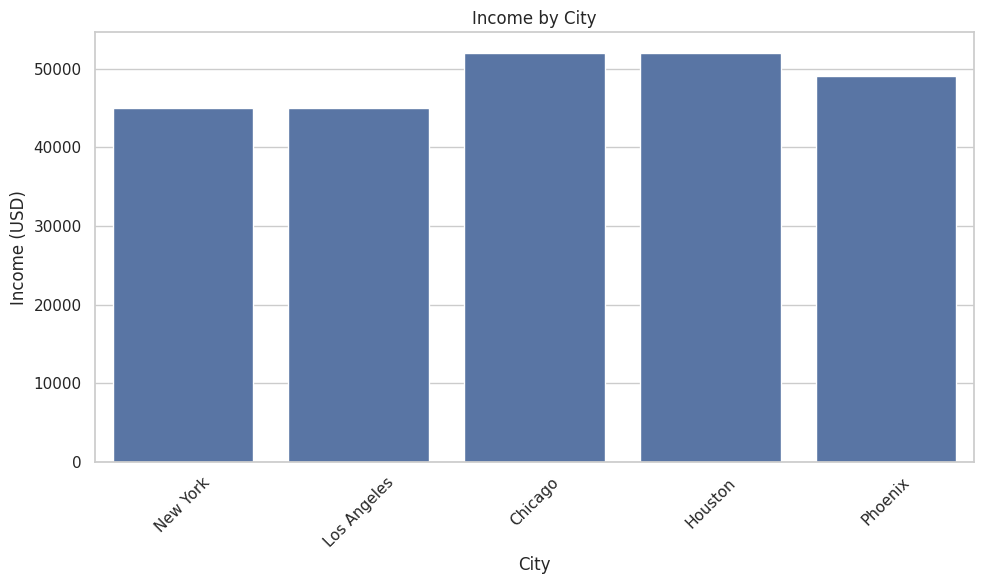

In [ ]:
# 2 Apply datacleaning tech

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create sample data
data = {
    'id': [1, 2, 3, 4, 5],
    'age_sex': ['25_M', '30_F', '22_M', '35_F', '28_M'],
    'height_cm': [175, 160, 180, 158, 170],
    'weight_kg': [70, 55, 75, 50, 68],
    'income_usd': [45000, -45000, 52000, -52000, -49000],
    'bmi': [22.9, 21.5, 23.1, 20.0, 23.5],
    'hours_sleep': [7, 8, 6, 7, 5],
    'exercise_hours_weekly': [3, np.nan, 4, 2, np.nan],
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
}

# Load data into DataFrame
df = pd.DataFrame(data)

# Split 'age_sex' into 'age' and 'sex'
df[['age', 'sex']] = df['age_sex'].str.split("_", expand=True)
df.drop(['age_sex'], axis=1, inplace=True)

# Convert 'age' to numeric
df['age'] = pd.to_numeric(df['age'])

# Fix negative income values
df['income_usd'].replace({-45000: 45000, -52000: 52000, -49000: 49000}, inplace=True)

# Fill missing exercise hours with the mean
mean_exercise = df['exercise_hours_weekly'].mean()
df['exercise_hours_weekly'].fillna(mean_exercise, inplace=True)

# Rearranging columns for readability
df = df[['id', 'age', 'sex', 'height_cm', 'weight_kg', 'bmi', 'hours_sleep',
         'exercise_hours_weekly', 'income_usd', 'city']]

# Display cleaned data
print("Cleaned DataFrame:")
print(df)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='income_usd', data=df)
plt.title("Income by City")
plt.xlabel("City")
plt.ylabel("Income (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#3 inferencial statistics t test

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Simulated Titanic-like dataset with extra columns
data = {
    'PassengerId': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Name': [
        'John Smith', 'Emily Clark', 'William Jones', 'Sophia Brown', 'James Wilson',
        'Olivia Taylor', 'Liam Davis', 'Emma Johnson', 'Noah Martinez', 'Ava Lee'
    ],
    'Gender': ['male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female'],
    'Survived': [1, 0, 1, 0, 1, 0, 1, 0, 0, 1],
    'Age': [22, 35, 26, 40, 19, 50, 28, 45, 60, 18]
}
df = pd.DataFrame(data)

# Show the first few rows
print("Data Preview:\n", df.head())

# Drop missing values in the 'Age' column (not needed here, but for real data)
df = df.dropna(subset=['Age'])

# Split data into Survived and Not Survived groups
survived_age = df[df["Survived"] == 1]["Age"]
not_survived_age = df[df["Survived"] == 0]["Age"]

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(survived_age, not_survived_age, equal_var=False)

# Print the results
print("\nT-Test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average age between survivors and non-survivors.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average age between survivors and non-survivors.")


Data Preview:
    PassengerId           Name  Gender  Survived  Age
0            1     John Smith    male         1   22
1            2    Emily Clark  female         0   35
2            3  William Jones    male         1   26
3            4   Sophia Brown  female         0   40
4            5   James Wilson    male         1   19

T-Test Results:
T-Statistic: -4.9597
P-Value: 0.0032
Reject the null hypothesis: There is a significant difference in average age between survivors and non-survivors.


<ipython-input-7-e0057bc291cd>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Fare', data=df, estimator=sum, ci=None, palette='Blues')
<ipython-input-7-e0057bc291cd>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Fare', data=df, estimator=sum, ci=None, palette='Blues')


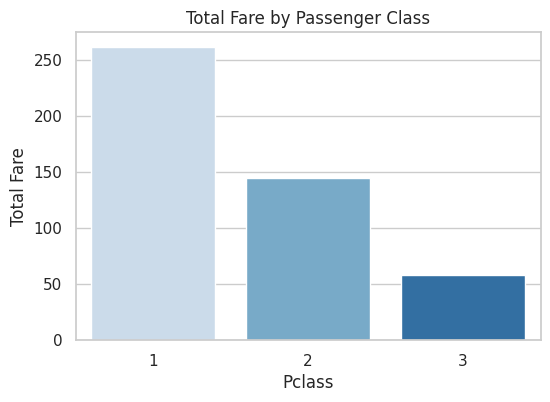

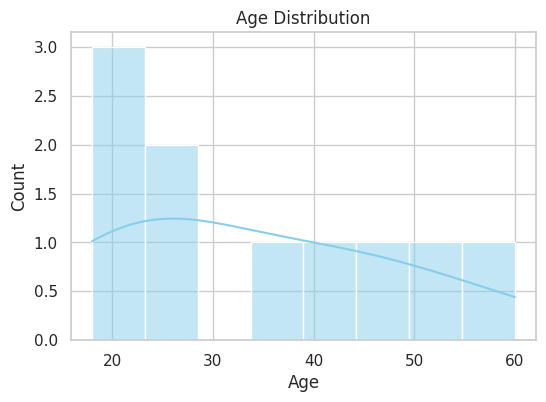

<ipython-input-7-e0057bc291cd>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, palette='Set2')


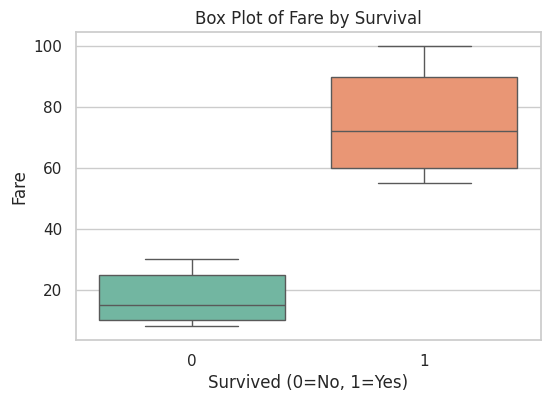

<ipython-input-7-e0057bc291cd>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='muted')


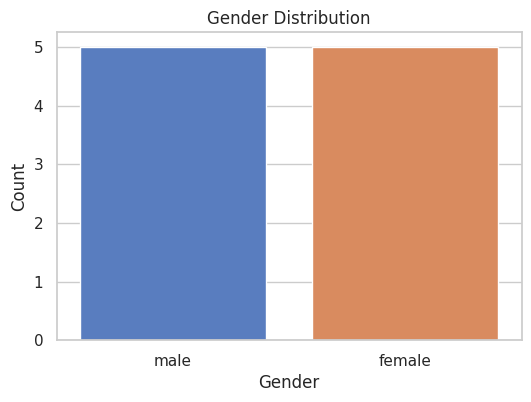

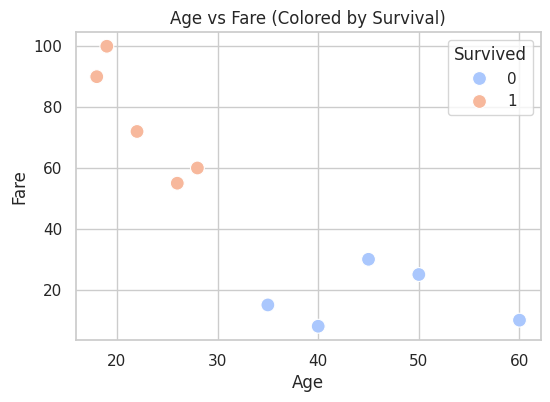

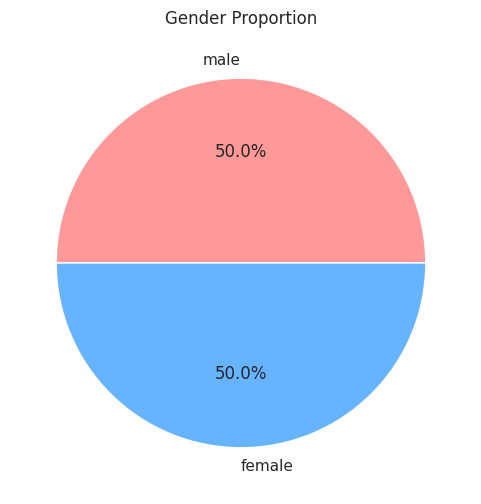

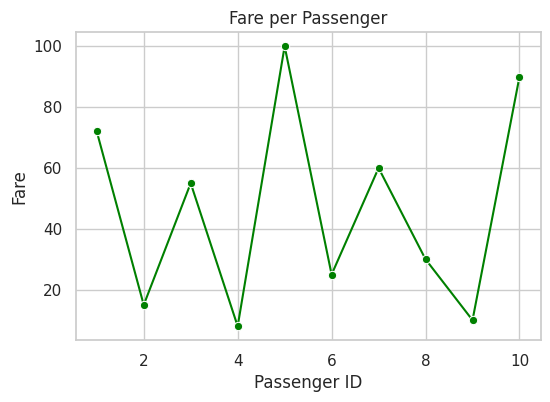

In [ ]:
#4 datavisualization

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'PassengerId': range(1, 11),
    'Name': ['John', 'Emily', 'William', 'Sophia', 'James', 'Olivia', 'Liam', 'Emma', 'Noah', 'Ava'],
    'Gender': ['male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female'],
    'Survived': [1, 0, 1, 0, 1, 0, 1, 0, 0, 1],
    'Age': [22, 35, 26, 40, 19, 50, 28, 45, 60, 18],
    'Fare': [72, 15, 55, 8, 100, 25, 60, 30, 10, 90],
    'Pclass': [1, 3, 2, 3, 1, 3, 2, 2, 3, 1]
}

df = pd.DataFrame(data)

# Set Seaborn theme
sns.set(style="whitegrid")

# 1. Bar Plot – Average Fare by Passenger Class
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Fare', data=df, estimator=sum, ci=None, palette='Blues')
plt.title("Total Fare by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Total Fare")
plt.show()

# 2. Histogram – Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=8, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 3. Box Plot – Fare by Survival
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Fare', data=df, palette='Set2')
plt.title("Box Plot of Fare by Survival")
plt.xlabel("Survived (0=No, 1=Yes)")
plt.ylabel("Fare")
plt.show()

# 4. Count Plot – Gender Count
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='muted')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 5. Scatter Plot – Age vs Fare colored by Survival
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, s=100, palette='coolwarm')
plt.title("Age vs Fare (Colored by Survival)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

# 6. Pie Chart – Gender Percentage
plt.figure(figsize=(6, 6))
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Gender Proportion")
plt.show()

# 7. Line Plot – Fare over Passenger IDs
plt.figure(figsize=(6, 4))
sns.lineplot(x='PassengerId', y='Fare', data=df, marker='o', color='green')
plt.title("Fare per Passenger")
plt.xlabel("Passenger ID")
plt.ylabel("Fare")
plt.show()


Mean Absolute Error: 0.53
Mean Squared Error: 0.56
Root Mean Squared Error: 0.75
R² Score: 0.58


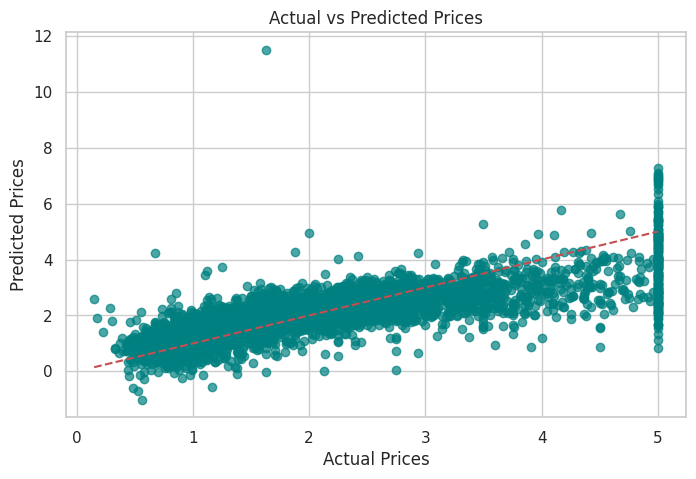

In [ ]:
#5 linear regression and performance evaluation metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler

# Load California housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target  # Add target variable

# Define features & target
X = df.drop(columns=['PRICE'])  # Features
y = df['PRICE']  # Target variable

# Split into train & test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.show()


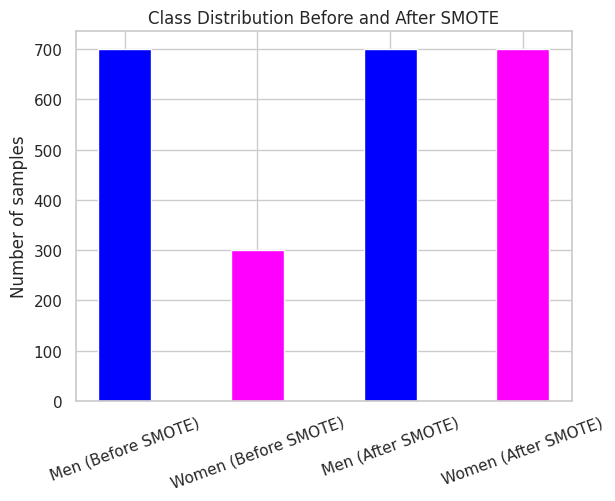

In [ ]:
#6 SMOTE
!pip install imbalanced-learn

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Step 1: Create an imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.7, 0.3],
                            n_informative=3, n_redundant=1, flip_y=0,
                            n_features=5, n_clusters_per_class=1,
                            n_samples=1000, random_state=42)

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Class distributions before and after SMOTE
before_counts = Counter(y)
after_counts = Counter(y_resampled)

# Set positions for bars with "Men" and "Women"
x_labels = ["Men (Before SMOTE)", "Women (Before SMOTE)",
            "Men (After SMOTE)", "Women (After SMOTE)"]
x_positions = np.arange(len(x_labels))

# Plot the bars
plt.bar(x_positions[:2], before_counts.values(), color=['blue', 'fuchsia'], width=0.4)
plt.bar(x_positions[2:], after_counts.values(), color=['blue', 'fuchsia'], width=0.4)

# Adjust x-axis labels without index
plt.xticks(x_positions, x_labels, rotation=20)  # Rotate labels for better readability

# Add labels and title
plt.ylabel("Number of samples")
plt.title("Class Distribution Before and After SMOTE")

# Show the plot without the legend
plt.show()


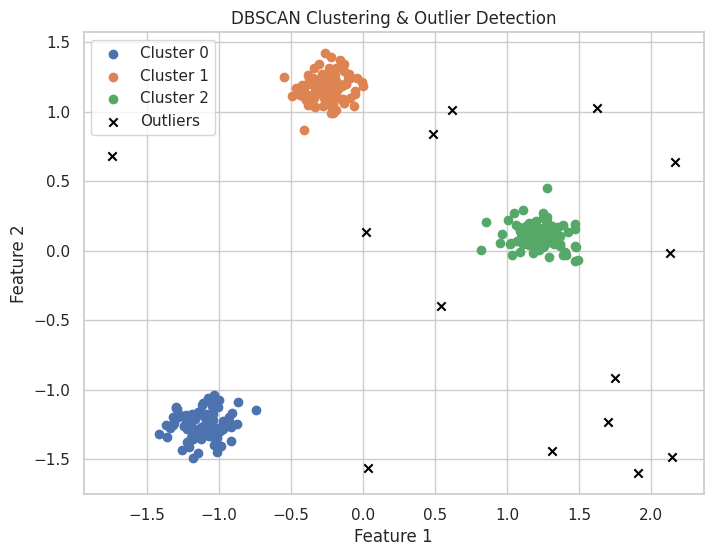

In [ ]:
#7 DBSCAN

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate synthetic data with clusters and some noise
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)
X = np.vstack([X, np.random.uniform(low=-10, high=10, size=(20, 2))])  # Add noise points

# Standardize features (DBSCAN is sensitive to scale)
X = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify outliers (DBSCAN labels them as -1)
outliers = X[labels == -1]

# Plot results
plt.figure(figsize=(8,6))
unique_labels = set(labels)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for label in unique_labels:
    if label == -1:
        # Outliers in black
        plt.scatter(outliers[:, 0], outliers[:, 1], c='black', marker='x', label='Outliers')
    else:
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Cluster {label}')

plt.legend()
plt.title("DBSCAN Clustering & Outlier Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


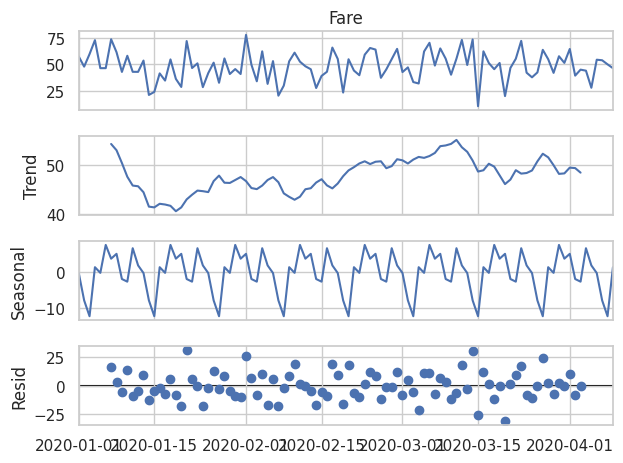

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Create synthetic Titanic-like dataset
np.random.seed(42)
n_samples = 100
data = {
    'Fare': np.random.normal(loc=50, scale=15, size=n_samples)  # Generate 100 random fares
}
titanic = pd.DataFrame(data)

# Step 2: Create a synthetic time-based index (e.g., daily frequency)
titanic['Date'] = pd.date_range(start='2020-01-01', periods=n_samples, freq='D')
titanic.set_index('Date', inplace=True)

# Step 3: Apply seasonal decomposition (using additive model)
# NOTE: period must be defined; we'll use 12 to simulate monthly seasonality
decomposition = seasonal_decompose(titanic['Fare'], model='additive', period=12)

# Step 4: Plot the decomposition
decomposition.plot()
plt.tight_layout()
plt.show()


<ipython-input-14-73c062cbe15a>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Fare'].fillna(method='ffill', inplace=True)  # Or use dropna() to remove rows with NaN
<ipython-input-14-73c062cbe15a>:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic['Fare'].fillna(method='ffill', inplace=True)  # Or use dropna() to remove rows with NaN


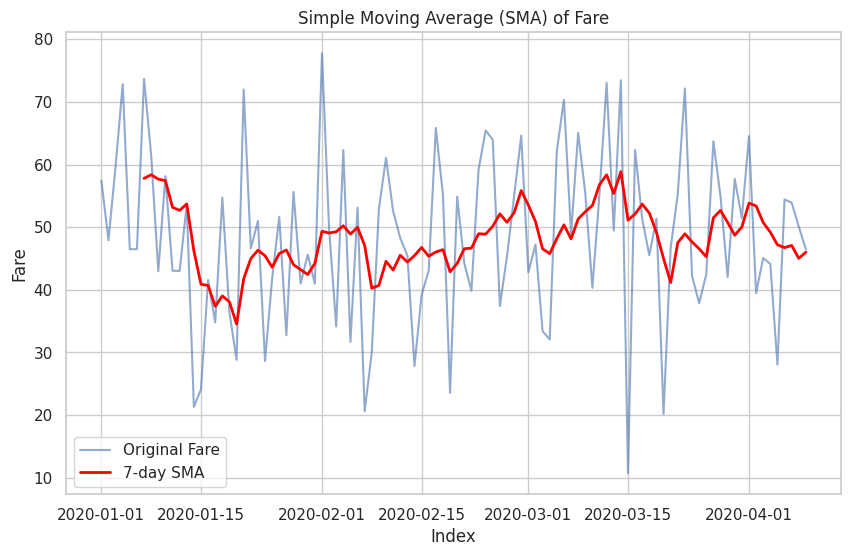

In [ ]:
#8 Moving avg

import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Fare' to numeric, coercing errors to NaN
titanic['Fare'] = pd.to_numeric(titanic['Fare'], errors='coerce')

# Handle missing values (if any) by forward filling or dropping
titanic['Fare'].fillna(method='ffill', inplace=True)  # Or use dropna() to remove rows with NaN

# Calculate the 7-day Simple Moving Average (SMA)
titanic['SMA'] = titanic['Fare'].rolling(window=7).mean()

# Plotting the original 'Fare' and 7-day SMA
plt.figure(figsize=(10, 6))
plt.plot(titanic['Fare'], label='Original Fare', alpha=0.6)
plt.plot(titanic['SMA'], label='7-day SMA', color='red', linewidth=2)
plt.legend()
plt.title('Simple Moving Average (SMA) of Fare')
plt.xlabel('Index')
plt.ylabel('Fare')
plt.show()
